In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

2022-08-26 00:42:28.477509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 00:42:28.477526: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]) , "Resim sayilari esit degil"
assert(X_test.shape[0] == y_test.shape[0]) , "Resim sayilari esit degil"
assert(X_train.shape[1:] == (28,28)) , "Resim pikselleri ayni degil"
assert(X_test.shape[1:] == (28,28)) , "Resim pikselleri ayni degil"


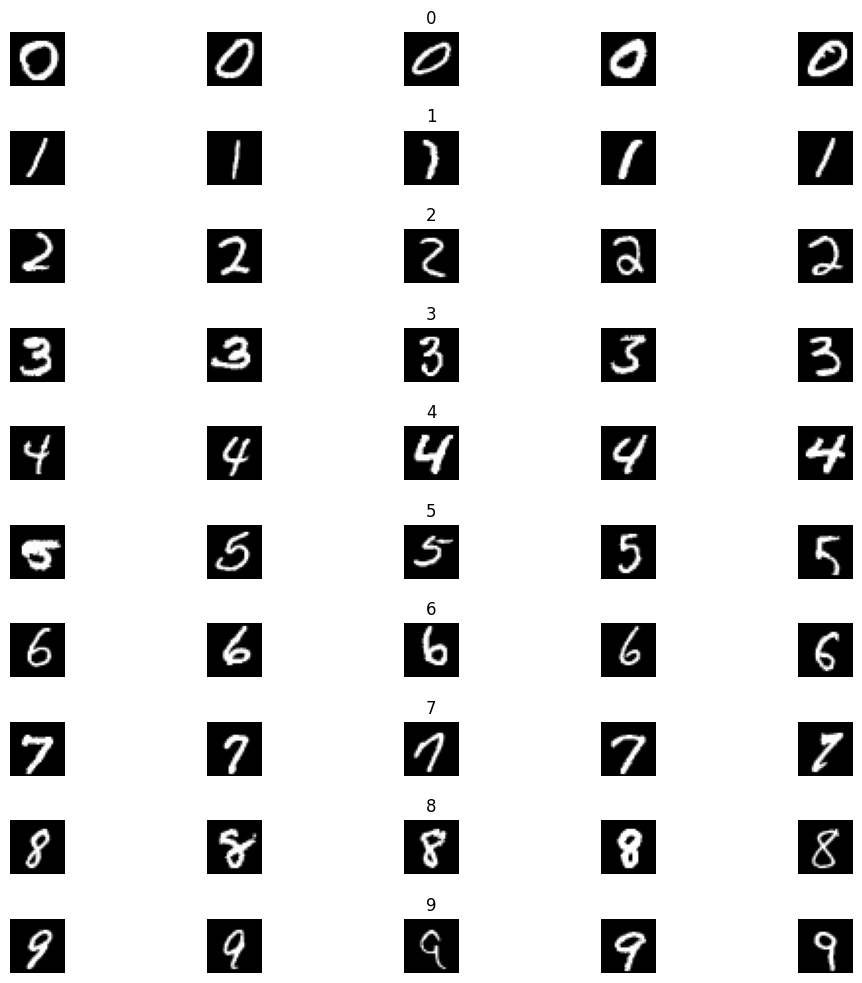

In [6]:
num_of_samples = []
cols = 5
number_classes = 10  #0-9 number

fig ,axs = plt.subplots(nrows=number_classes,ncols=cols,figsize = (10,10))
fig.tight_layout()

for i in range(cols):
    for j in range(number_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)),:,:], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")    
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'image number')

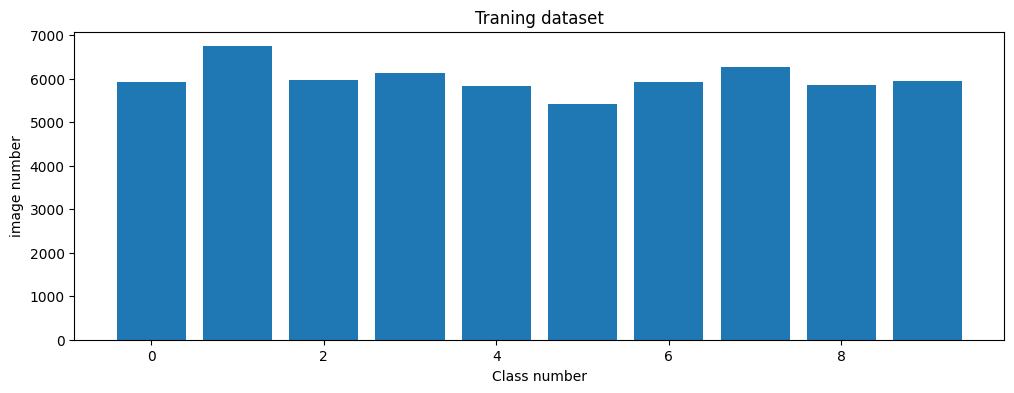

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,number_classes),num_of_samples)
plt.title("Traning dataset")
plt.xlabel("Class number")
plt.ylabel("image number")

In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [9]:
X_train = X_train /255
X_test = X_test / 255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

X_test.shape

(10000, 784)

In [11]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(number_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


2022-08-26 00:42:32.307988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 00:42:32.308184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 00:42:32.308222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-26 00:42:32.308256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-26 00:42:32.308290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10


2022-08-26 00:42:32.488035: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


270/270 [==============================] - 1s 3ms/step - loss: 0.7524 - accuracy: 0.7555 - val_loss: 0.3267 - val_accuracy: 0.9043
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.8958 - val_loss: 0.2653 - val_accuracy: 0.9228
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3045 - accuracy: 0.9113 - val_loss: 0.2318 - val_accuracy: 0.9352
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.9186 - val_loss: 0.2301 - val_accuracy: 0.9317
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9228 - val_loss: 0.2172 - val_accuracy: 0.9368
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.9243 - val_loss: 0.2129 - val_accuracy: 0.9423
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2452 - accuracy: 0.9291 - val_loss: 0.2231 - val_accuracy: 0.9327
Epoch 8/10
270/27

Text(0.5, 0, 'epoch')

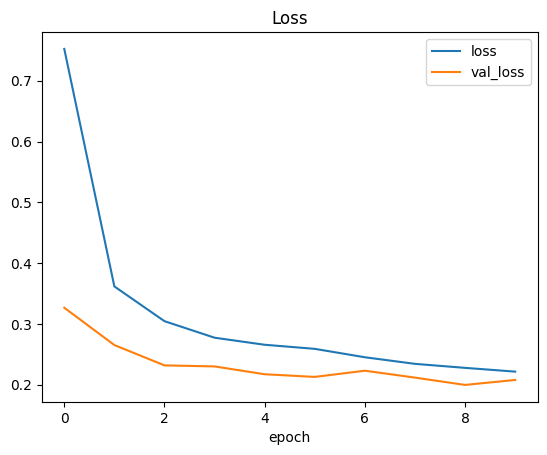

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

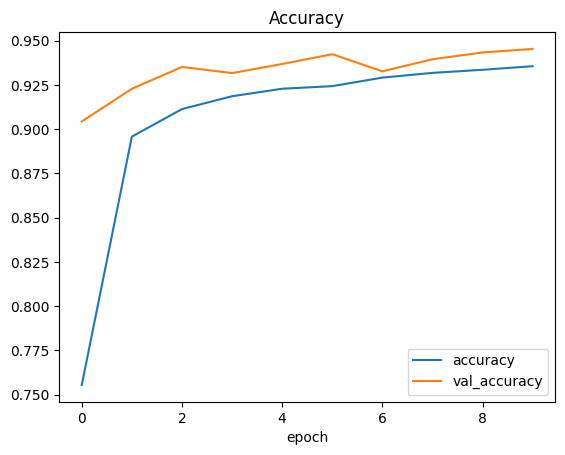

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.25417590141296387
Test accuracy: 0.9276000261306763


In [17]:
import requests
from PIL import Image

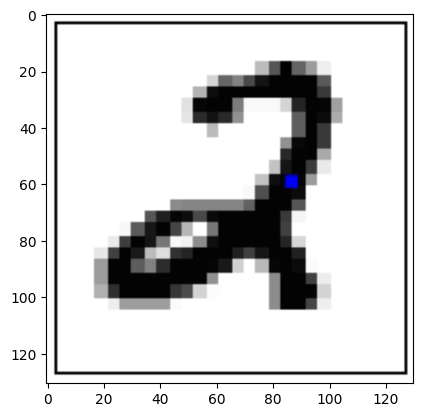

In [18]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

1/1 [==============================] - 0s 100ms/step
predicted digit: [2]


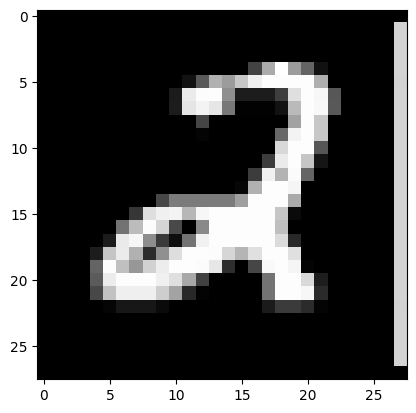

In [19]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
 
predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)


print("predicted digit:", str(classes_x))